# Isolation Forest
> 이상치 탐지  
> 이상치일수록 tree에서 먼저 고립될 확률이 높음

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<br/>
<br/>
<br/>
<br/>

## Data

In [2]:
np.random.seed(42)

#
# Generating train data 
#

X_train = 0.2 * np.random.randn(1000, 2)
X_train = np.vstack([X_train, X_train + 3])
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

#
# Generating test data
#

X_test = 0.2 * np.random.randn(200, 2)
X_test = np.vstack([X_test, X_test + 3])
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

#
# Generating outliers
#

X_outliers = np.random.uniform(-1, 5, (50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

<br/>
<br/>

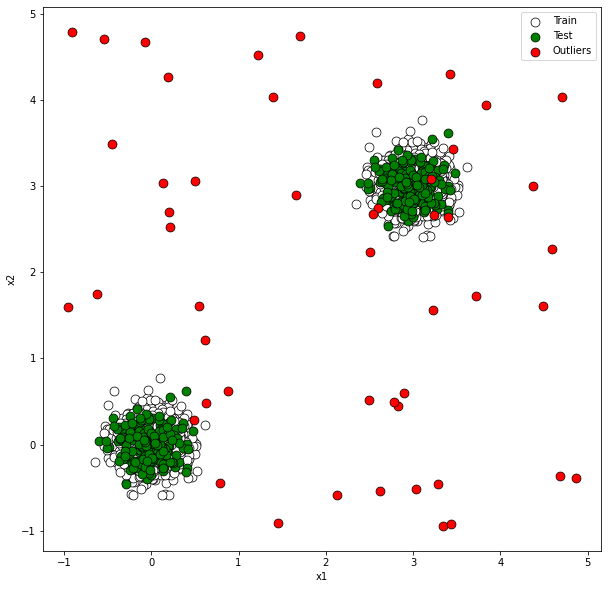

In [3]:
plt.figure(figsize = (10, 10))

sns.scatterplot(data = X_train, x = 'x1', y = 'x2', color = 'white', edgecolor = 'k', s = 80, label = 'Train', zorder = 1)
sns.scatterplot(data = X_test, x = 'x1', y = 'x2', color = 'green', edgecolor = 'k', s = 80, label = 'Test', zorder = 2)
sns.scatterplot(data = X_outliers, x = 'x1', y = 'x2', color = 'red', edgecolor = 'k', s = 80, label = 'Outliers', zorder = 3)

plt.legend()
plt.show()

<br/>
<br/>
<br/>
<br/>

## Isolation Forest Modeling

In [4]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators = 100,
                      max_samples = 100,
                      contamination = 0.1, # 이상치 비율
                      random_state = 42)

clf.fit(X_train)

IsolationForest(contamination=0.1, max_samples=100, random_state=42)

<br/>
<br/>
<br/>
<br/>

## Prediction
- 1 : 정상
- -1 : 이상치

In [5]:
def print_cnt(pred) :
    labels, cnts = np.unique(pred, return_counts = True)
    print(f'# of data : {len(pred)}')
    for label, cnt in zip(labels, cnts) :
        print(f'Label : {label:2d}  Count : {cnt}')
    print()

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
pred_out = clf.predict(X_outliers)

print_cnt(pred_train)
print_cnt(pred_test)
print_cnt(pred_out)

# of data : 2000
Label : -1  Count : 200
Label :  1  Count : 1800

# of data : 400
Label : -1  Count : 28
Label :  1  Count : 372

# of data : 50
Label : -1  Count : 49
Label :  1  Count : 1



<br/>
<br/>
<br/>
<br/>

## Prediction & Score Plot
- score : 특정 threshold를 기준으로 정상 / 이상치가 결정

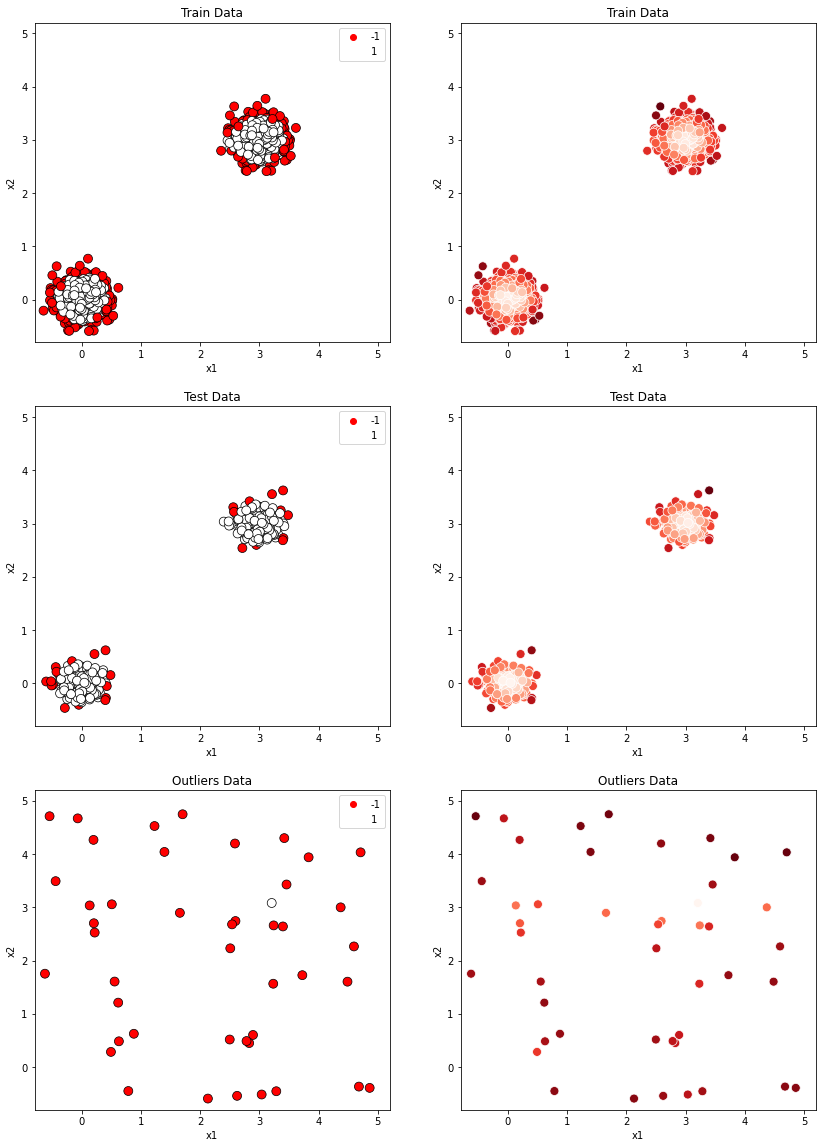

In [6]:
names = ['Train', 'Test', 'Outliers']
plt.figure(figsize = (14,20))

for i, data in enumerate([X_train, X_test, X_outliers]) :
    # prediction & score
    pred = clf.predict(data)
    score = clf.decision_function(data)
    
    # plot outliers
    plt.subplot(3,2,2*i+1)
    sns.scatterplot(data = data, x = 'x1', y = 'x2', hue = pred, palette = ['red', 'w'], s = 80, edgecolor = 'k')
    plt.title(f'{names[i]} Data')
    plt.xlim(-0.8, 5.2)
    plt.ylim(-0.8, 5.2)
    
    # plot isolation forest score
    plt.subplot(3,2,2*i+2)
    palette = 'Reds_r'
    ax = sns.scatterplot(data = data, x = 'x1', y = 'x2', hue = score, palette = palette, s = 80, legend = False)
    
    # color bar
#     norm = plt.Normalize(score.min(), score.max())
#     sm = plt.cm.ScalarMappable(cmap = palette, norm=norm)
#     sm.set_array([])
#     ax.figure.colorbar(sm)

    plt.title(f'{names[i]} Data')
    plt.xlim(-0.8, 5.2)
    plt.ylim(-0.8, 5.2)
    
plt.show()

<br/>
<br/>
<br/>
<br/>

## Outliers Data

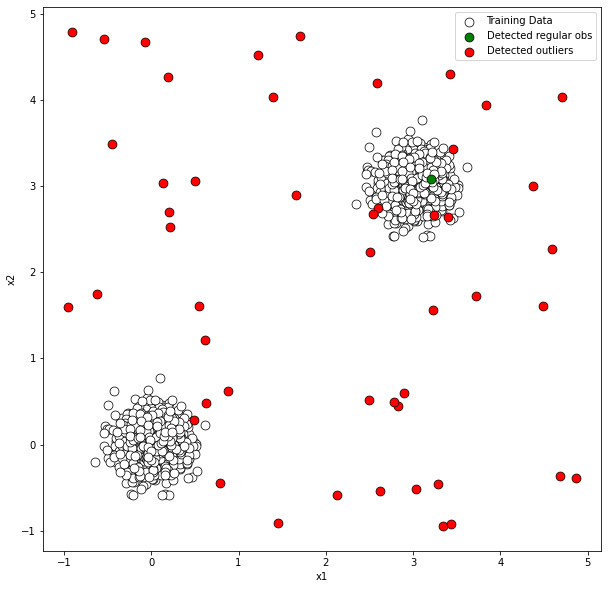

In [7]:
plt.figure(figsize = (10, 10))

# Training Data
sns.scatterplot(data = X_train, x = 'x1', y = 'x2', color = 'w', s = 80, edgecolor = 'k', label = 'Training Data')

# Detected regular obs
sns.scatterplot(data = X_outliers[pred_out == 1], x = 'x1', y = 'x2', color = 'green', s = 80, edgecolor = 'k', label = 'Detected regular obs')

# Detected outliers
sns.scatterplot(data = X_outliers[pred_out == -1], x = 'x1', y = 'x2', color = 'red', s = 80, edgecolor = 'k', label = 'Detected outliers')

plt.legend()
plt.show()

<br/>
<br/>
<br/>
<br/>

## Score

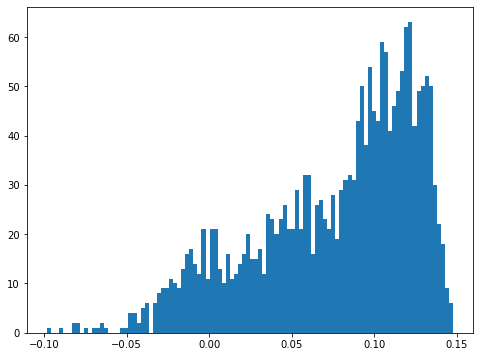

In [8]:
plt.figure(figsize = (8,6))
plt.hist(clf.decision_function(X_train), bins = 100)
plt.show()

<br/>
<br/>
<br/>
<br/>

- Reference
    - https://partrita.github.io/posts/isolation-forest/